In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [7]:
df = pd.read_csv('/Users/austi/Documents/QTW/Case Study 6/all_train.csv.gz', compression='gzip')

In [8]:
print(df)

         # label        f0        f1        f2        f3        f4        f5  \
0            1.0 -0.346368  0.416306  0.999236  0.475342  0.427493 -0.005984   
1            1.0  1.708236 -0.319394 -1.241873 -0.887231 -0.871906 -0.005984   
2            0.0 -0.360693  1.794174  0.264738 -0.472273 -0.292344 -1.054221   
3            1.0 -0.377914 -0.103932 -0.649434 -2.125015 -1.643797 -0.005984   
4            0.0 -0.067436 -0.636762 -0.620166 -0.062551  1.588715 -0.005984   
...          ...       ...       ...       ...       ...       ...       ...   
6999995      0.0  1.617264 -0.537084 -1.275867  0.650799 -1.511621  0.850488   
6999996      0.0 -0.511357  0.270927  0.085989 -0.243802 -1.035668 -0.005984   
6999997      1.0  0.062408 -0.987203  0.570667  1.517195  0.639548 -1.054221   
6999998      1.0  1.659131  1.096223  0.562821  1.627193  0.767236 -1.054221   
6999999      1.0  0.002034  0.744152 -0.908839 -0.770454  1.008405 -1.054221   

               f6        f7        f8  

In [9]:
X = df.drop(columns=['# label'])
y = df['# label']
print(df.shape)
print(X.shape)
print(y.shape)

(7000000, 29)
(7000000, 28)
(7000000,)


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledTrain = scaler.fit_transform(X)

In [11]:
print(scaledTrain.shape)

(7000000, 28)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaledTrain, y, test_size = 0.2)
X_predict, X_val, y_predict, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))



In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=64,
          callbacks=[callback],
          validation_data=[X_val,y_val])

Epoch 1/100
87500/87500 [==============================] - 222s 3ms/step - loss: 0.2994 - accuracy: 0.8612 - val_loss: 0.2823 - val_accuracy: 0.8717
Epoch 2/100
87500/87500 [==============================] - 225s 3ms/step - loss: 0.2845 - accuracy: 0.8707 - val_loss: 0.2774 - val_accuracy: 0.8748
Epoch 3/100
87500/87500 [==============================] - 227s 3ms/step - loss: 0.2806 - accuracy: 0.8729 - val_loss: 0.2756 - val_accuracy: 0.8776
Epoch 4/100
87500/87500 [==============================] - 231s 3ms/step - loss: 0.2786 - accuracy: 0.8743 - val_loss: 0.2741 - val_accuracy: 0.8772
Epoch 5/100
87500/87500 [==============================] - 229s 3ms/step - loss: 0.2774 - accuracy: 0.8751 - val_loss: 0.2812 - val_accuracy: 0.8773
Epoch 6/100
87500/87500 [==============================] - 229s 3ms/step - loss: 0.2763 - accuracy: 0.8757 - val_loss: 0.2720 - val_accuracy: 0.8780
Epoch 7/100
87500/87500 [==============================] - 230s 3ms/step - loss: 0.2755 - accuracy: 0.8762

In [15]:
loss, acc = model.evaluate(X_test,y_test)
print(acc)

43750/43750 [==============================] - 65s 1ms/step - loss: 0.2770 - accuracy: 0.8784
0.8783928751945496


In [16]:
print(history.history)

{'loss': [0.29941287636756897, 0.2845049202442169, 0.28061121702194214, 0.2786010503768921, 0.2773591876029968, 0.27630454301834106, 0.27545782923698425, 0.2748630940914154, 0.27447453141212463, 0.2741922438144684, 0.2738015949726105, 0.2736508846282959, 0.27350500226020813, 0.27359452843666077, 0.27346041798591614], 'accuracy': [0.861196756362915, 0.8706557154655457, 0.8728917837142944, 0.8742709159851074, 0.8750553727149963, 0.8756524920463562, 0.8762228488922119, 0.8764466047286987, 0.8767266273498535, 0.8768324851989746, 0.8771160840988159, 0.8772060871124268, 0.8773223161697388, 0.8774116039276123, 0.8774126768112183], 'val_loss': [0.28229549527168274, 0.2774001955986023, 0.275566428899765, 0.27414458990097046, 0.28123942017555237, 0.27196070551872253, 0.27352720499038696, 0.27455487847328186, 0.2767656147480011, 0.2700658440589905, 0.2714327275753021, 0.2724440395832062, 0.2800566852092743, 0.270453542470932, 0.2766622006893158], 'val_accuracy': [0.8716585636138916, 0.87477856874

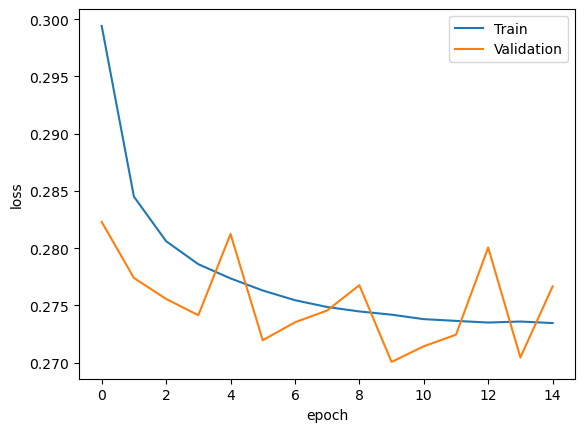

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
yPred = model.predict(X_predict)

21875/21875 [==============================] - 30s 1ms/step


In [19]:
print(yPred)

[[2.5666855e-02]
 [7.1567629e-04]
 [9.4116706e-01]
 ...
 [4.6627678e-02]
 [8.9511460e-01]
 [5.3685017e-02]]


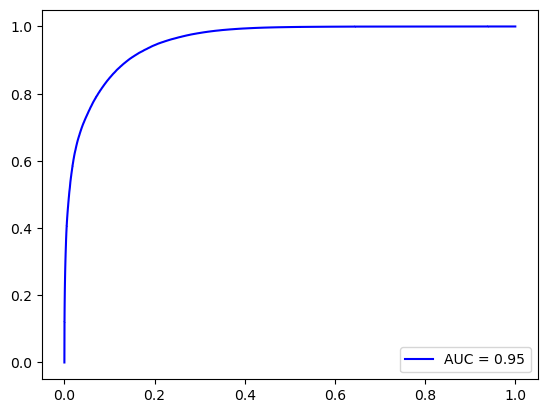

In [20]:
fpr, tpr, thresholds = roc_curve(y_predict,yPred)
roc_auc = roc_auc_score(y_predict,yPred)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)

43750/43750 [==============================] - 56s 1ms/step
Confusion Matrix:
[[585490 113408]
 [ 56842 644260]]


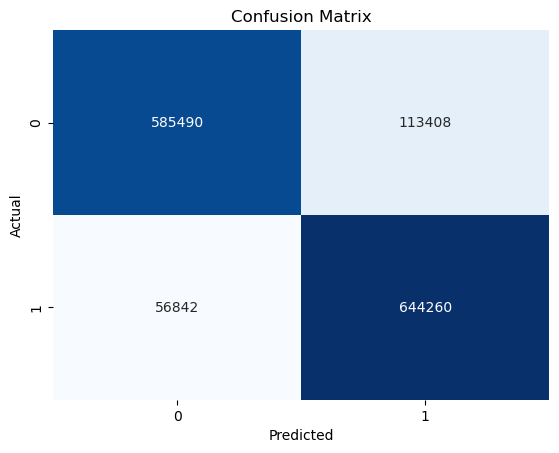

In [26]:
sns.heatmap(conf_matrix, 
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False,
            xticklabels = ['0', '1'],
            yticklabels = ['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()